<a href="https://colab.research.google.com/github/menduv/mtg-Jamendo/blob/main/MTG_spec_importing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/MTG/mtg-jamendo-dataset.git

fatal: destination path 'mtg-jamendo-dataset' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('/content/mtg-jamendo-dataset')

In [ ]:
import tarfile
import shutil
import numpy as np
import matplotlib as plt

In [ ]:
!sudo apt update
!sudo apt install python3.10-venv

!python3 -m venv venv
!source venv/bin/activate
!pip3 install -r scripts/requirements.txt

In [ ]:
!mkdir '/content/mtg-jamendo-dataset/data/melspecs_download'

In [ ]:
!python3 scripts/download/download.py --dataset autotagging_moodtheme --type melspecs /content/mtg-jamendo-dataset/data/melspecs_download --unpack --remove

Downloading...
From: https://cdn.freesound.org/mtg-jamendo/autotagging_moodtheme/melspecs/autotagging_moodtheme_melspecs-00.tar
To: /content/mtg-jamendo-dataset/data/melspecs_download/autotagging_moodtheme_melspecs-00.tar
100% 767M/767M [00:30<00:00, 25.4MB/s]
autotagging_moodtheme_melspecs-00.tar checksum OK
Downloading...
From: https://cdn.freesound.org/mtg-jamendo/autotagging_moodtheme/melspecs/autotagging_moodtheme_melspecs-01.tar
To: /content/mtg-jamendo-dataset/data/melspecs_download/autotagging_moodtheme_melspecs-01.tar
100% 750M/750M [00:28<00:00, 25.9MB/s]
autotagging_moodtheme_melspecs-01.tar checksum OK
Downloading...
From: https://cdn.freesound.org/mtg-jamendo/autotagging_moodtheme/melspecs/autotagging_moodtheme_melspecs-02.tar
To: /content/mtg-jamendo-dataset/data/melspecs_download/autotagging_moodtheme_melspecs-02.tar
100% 804M/804M [00:31<00:00, 25.2MB/s]
autotagging_moodtheme_melspecs-02.tar checksum OK
Downloading...
From: https://cdn.freesound.org/mtg-jamendo/autotagg

In [ ]:
'''To extract the .tar files'''

# Specify the path to the folder containing the .tar files
folder_path = '/content/mtg-jamendo-dataset/data/melspecs_download'

# List all files in the melspecs_download folder
files = os.listdir(folder_path)

# Extract each .tar file
for file_name in files:  #iterate over each element in melspecs_download
    if file_name.endswith('.tar'):    #checking if file is a .tar file
        file_path = os.path.join(folder_path, file_name)    #creating a file path

        # Create a new folder to extract files into
        extraction_folder = os.path.join(folder_path, file_name.split('.tar')[0])
        os.makedirs(extraction_folder, exist_ok=True)

        with tarfile.open(file_path, 'r') as tar:
            tar.extractall(extraction_folder)

        # Remove the .tar file after extraction
        os.remove(file_path)

print("Extraction complete.")


Extraction complete.


In [ ]:
'''To get all the .npy files in the trail_download folder'''

# Set the source and destination folders
source_folder = '/content/mtg-jamendo-dataset/data/melspecs_download'
destination_folder = '/content/mtg-jamendo-dataset/data/melspecs_download'

# Iterate through all subfolders in the source folder
for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.endswith('.npy'):
            # Build the full path of the source file
            source_file_path = os.path.join(root, file)

            # Build the full path of the destination file
            destination_file_path = os.path.join(destination_folder, file)

            # Move (cut and paste) the file to the destination folder
            shutil.move(source_file_path, destination_file_path)

print("Files moved successfully.")

Files moved successfully.


In [ ]:
'''To delete all the empty folders and deleting all the .tar files in the enxt cell'''

def delete_empty_folders(root_folder):
    for root, dirs, files in os.walk(root_folder, topdown=False):
        for dir_name in dirs:
            folder_path = os.path.join(root, dir_name)
            if not os.listdir(folder_path):  # Check if the folder is empty
                #print(f"Deleting empty folder: {folder_path}")
                os.rmdir(folder_path)

delete_empty_folders('/content/mtg-jamendo-dataset/data/melspecs_download')


In [ ]:
import glob
print(len(list(glob.glob("/content/mtg-jamendo-dataset/data/melspecs_download/*"))))

5972


# Crop the mel-spectrograms at 30 seconds

In [ ]:
def crop_melspectrogram(mel_spectrogram, target_frames, hop_size):
    ''' Crop or pad the mel spectrogram to the target number of frames '''
    if mel_spectrogram.shape[1] >= target_frames:
        cropped_mel_spectrogram = mel_spectrogram[:, :target_frames]
    else:
        # Pad with zeros if the original length is less than the target
        padding = np.zeros((mel_spectrogram.shape[0], target_frames - mel_spectrogram.shape[1]))
        cropped_mel_spectrogram = np.hstack((mel_spectrogram, padding))

    return cropped_mel_spectrogram

In [ ]:
!mkdir '/content/cropped_mel'

In [ ]:
folder_path = '/content/mtg-jamendo-dataset/data/melspecs_download'
cropped_folder_path = '/content/cropped_mel'

# Assuming the hop size used during mel spectrogram calculation
hop_size = 256
sample_rate = 12000

# Calculate the target number of frames based on the desired duration (e.g., 30 seconds)
desired_duration_seconds = 30
target_frames = int(desired_duration_seconds * (1 / (hop_size / sample_rate)))

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    mel_spectrogram = np.load(file_path)

    cropped_mel_spectrogram = crop_melspectrogram(mel_spectrogram, target_frames, hop_size)

    np.save(os.path.join(cropped_folder_path, filename), cropped_mel_spectrogram)

In [ ]:
print('The number of cropped mel-spectrogram in the cropped_mel folder is:',len(os.listdir('/content/cropped_mel')))

The number of cropped mel-spectrogram in the cropped_mel folder is: 5972


In [ ]:
import shutil

def zip_folder(source_folder, zip_name):
    shutil.make_archive(zip_name, 'zip', source_folder)

In [ ]:
zip_folder('/content/cropped_mel', '/content/cropped_archive_30')

In [ ]:
from google.colab import drive, files
#drive.mount('/content/drive')
files.download("/content/cropped_archive_30.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Specify the path of the file you want to move
source_file_path = '/content/cropped_archive_shift_cropped_30.zip'

# Specify the destination folder (root folder/drive folder)
destination_folder = '/content/drive/MyDrive/colab_data'

# Move the file to the destination folder
shutil.move(source_file_path, destination_folder)

'/content/drive/MyDrive/colab_data/cropped_archive_shift_cropped_30.zip'

# Cropping those that are longer than 60 seconds

In [ ]:
def crop_melspectrogram_frame(mel_spectrogram, start_time, target_duration, sample_rate, hop_size):
    '''Function to crop mel-specs for the given start time and target duration'''
    start_frame = int(start_time * sample_rate / hop_size) # you get some number which will tell you where on the mel-specs to start
    end_frame = start_frame + int(target_duration * sample_rate / hop_size)

    # checking if mel-spec is long enough
    cropped_mel_spectrogram = mel_spectrogram[:, start_frame:end_frame]
    return cropped_mel_spectrogram

In [ ]:
folder_path = '/content/mtg-jamendo-dataset/data/melspecs_download'
cropped_folder_path = '/content/crop_shift_mel'
melspecs_folder = os.listdir(folder_path)

# Assuming the hop size used during mel spectrogram calculation
hop_size = 256
sample_rate = 12000

# Define the start time and the duration for cropping
start_time_seconds = 30
target_duration_seconds = 30

start_frame = int(start_time_seconds * sample_rate / hop_size)
end_frame = start_frame + int(target_duration_seconds * sample_rate / hop_size)

In [ ]:
!mkdir '/content/crop_shift_mel'

In [ ]:
# Iterate over files in the folder
for filename in melspecs_folder:
    file_path = os.path.join(folder_path, filename)

    # Load the mel-spectrogram
    mel_spectrogram = np.load(file_path)

    if mel_spectrogram.shape[1] >= end_frame:

        # Crop the mel-spectrogram from start_time to start_time + duration
        cropped_mel_spectrogram = crop_melspectrogram_frame(mel_spectrogram, start_time_seconds, target_duration_seconds, sample_rate, hop_size)

        # Save the cropped mel-spectrogram
        cropped_file_path = os.path.join(cropped_folder_path, filename.split('.npy')[0] + '_30-60.npy')
        np.save(cropped_file_path, cropped_mel_spectrogram)

In [ ]:
len(os.listdir(cropped_folder_path))

5684

In [ ]:
zip_folder(cropped_folder_path, '/content/cropped_archive_shift_cropped_30')

In [ ]:
files.download('/content/cropped_archive_shift_cropped_30.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tarfile

def extract_all_files(tar_file_path, extract_to):
    with tarfile.open(tar_file_path, 'r') as tar:
        tar.extractall(extract_to)

# Example usage
tar_file_path = '/content/mtg-jamendo-dataset/data/trail_download/autotagging_moodtheme_melspecs-00.tar'
extract_to = '/content/mtg-jamendo-dataset/data/extracted_tar'
extract_all_files(tar_file_path, extract_to)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_data = np.load('/content/mtg-jamendo-dataset/data/trail_download/autotagging_moodtheme_melspecs-01/01/1009701.npy')
# Display the image
plt.imshow(image_data)  # Assuming it's a grayscale image
plt.axis('off')
plt.show()

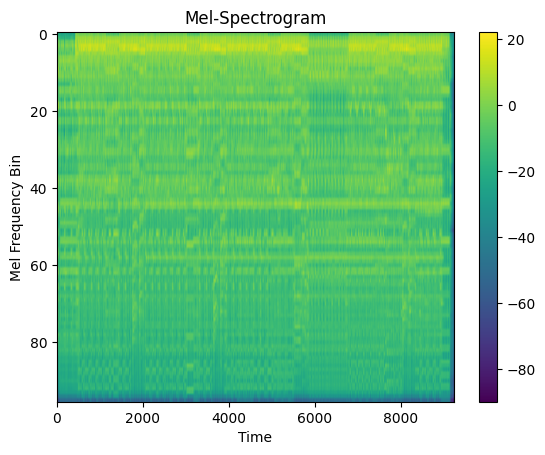

In [ ]:
plt.imshow(image_data, aspect='auto')
plt.xlabel('Time')
plt.ylabel('Mel Frequency Bin')
plt.title('Mel-Spectrogram')
plt.colorbar()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_data = np.load('/content/mtg-jamendo-dataset/data/trail_download/1001307.npy')
# Display the image
plt.imshow(image_data, cmap='gray')  # Assuming it's a grayscale image
plt.axis('off')
plt.show()

In [ ]:
image_data = np.load('/content/mtg-jamendo-dataset/data/extracted_tar/00/1014400.npy')
# Display the image
plt.imshow(image_data, cmap='gray')  # Assuming it's a grayscale image
plt.axis('off')
plt.show()